# Multimodal Classification Training

This notebook creates the Multimodal Network Architecture and trains it for grasp testset1. After training the network weights will be stored in the folder `./dataset/grasp_testset1_logs`

## Dependencies

`Python 3.5.4` is used for development and following packages are required to run the code provided in the notebook:

`pip install googledrivedownloader`<br>
`pip install matplotlib`<br>
`pip install tensorflow-gpu`<br>
`pip install keras`<br>
`pip install numpy`

In [1]:
import pickle, os, csv, time, shutil
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from google_drive_downloader import GoogleDriveDownloader as gdd

In [2]:
def print_image(image, title):
    """Print the image

    :param image: image pixels in list
    :param title: title as string to be printed on top of the image
    """
    plt.imshow(image)
    plt.title(title)
    plt.colorbar()
    plt.show()

def time_taken(start, end):
    """Human readable time between `start` and `end`

    :param start: time.time()
    :param end: time.time()
    :returns: day:hour:minute:second
    """
    time = end-start
    day = time // (24 * 3600)
    time = time % (24 * 3600)
    hour = time // 3600
    time %= 3600
    minutes = time // 60
    time %= 60
    seconds = time
    day_hour_min_sec = str('%02d' % int(day))+":"+str('%02d' % int(hour))+":"+str('%02d' % int(minutes))+":"+str('%02d' % int(seconds))
    
    return day_hour_min_sec

In [3]:
"""
Downloading `category_object_labels.bin`.
This contains two dictionaries that stores category labels and object labels
"""

# gdd.download_file_from_google_drive(file_id='15xPAbso4-uLk8PcRi9cb70r1r3FaU6ux', dest_path='./dataset/category_object_labels.bin', unzip=False)
bin_file = open("./dataset/category_object_labels.bin", "rb")
category_labels = pickle.load(bin_file)
object_labels = pickle.load(bin_file)
bin_file.close()

## Video Dataset

In [4]:
"""
Downloading testset1 for video of grasp interaction and reading it.
"""

db_file_name = "grasp_120x90_testset1.bin"
gdd.download_file_from_google_drive(file_id='1o8FvoQskCS9rE8Bh4VkUUNMtJgKmDe67',
                                    dest_path='./dataset/'+db_file_name,
                                    unzip=False)

bin_file = open("./dataset/"+db_file_name, "rb")

video_frames_5d_train = pickle.load(bin_file)
category_label_train = pickle.load(bin_file)
object_label_train = pickle.load(bin_file)
category_label_train_one_hot = pickle.load(bin_file)
object_label_train_one_hot = pickle.load(bin_file)

video_frames_5d_test = pickle.load(bin_file)
category_label_test = pickle.load(bin_file)
object_label_test = pickle.load(bin_file)
category_label_test_one_hot = pickle.load(bin_file)
object_label_test_one_hot = pickle.load(bin_file)

bin_file.close()

batch, frames, height, width, channel:  (400, 20, 90, 120, 3)


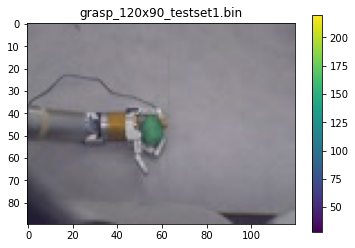

Category:  egg
Object:  egg_rough_styrofoam


In [5]:
"""
Display a frame of the video dataset
"""

batch_no = 188
frame_no = 10

print("batch, frames, height, width, channel: ", video_frames_5d_train.shape)

print_image(video_frames_5d_train[batch_no][frame_no], db_file_name)

print("Category: ", list(category_labels.keys())[list(category_labels.values()).index(category_label_train[batch_no])])
print("Object: ", list(object_labels.keys())[list(object_labels.values()).index(object_label_train[batch_no])])

## Sound Dataset

In [6]:
"""
Downloading testset1 for sound of grasp interaction and reading it.
"""

db_file_name = "grasp_60Freq_50TimePerSec_testset1.bin"
gdd.download_file_from_google_drive(file_id='1WChpWIY53Ww1Z7NWjJ1YfQOim5goMD9N',
                                    dest_path='./dataset/'+db_file_name,
                                    unzip=False)

bin_file = open("./dataset/"+db_file_name, "rb")

audio_frames_2d_train = pickle.load(bin_file)
category_label_train = pickle.load(bin_file)
object_label_train = pickle.load(bin_file)
category_label_train_one_hot = pickle.load(bin_file)
object_label_train_one_hot = pickle.load(bin_file)

audio_frames_2d_test = pickle.load(bin_file)
category_label_test = pickle.load(bin_file)
object_label_test = pickle.load(bin_file)
category_label_test_one_hot = pickle.load(bin_file)
object_label_test_one_hot = pickle.load(bin_file)

bin_file.close()

batch, frames, freq, channel: (400, 100, 60, 2)


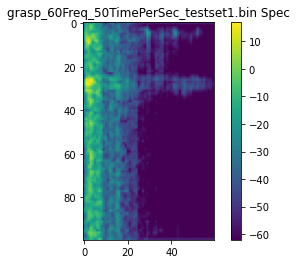

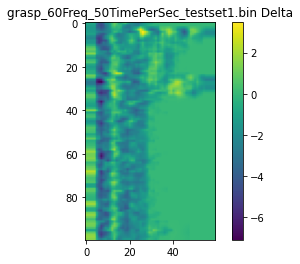

Category:  egg
Object:  egg_rough_styrofoam


In [7]:
"""
Display a frame of the sound dataset
"""

batch_no = 188

print("batch, frames, freq, channel:", audio_frames_2d_train.shape)

print_image(audio_frames_2d_train[batch_no, :, :, 0], db_file_name+" Spec")
print_image(audio_frames_2d_train[batch_no, :, :, 1], db_file_name+" Delta")

print("Category: ", list(category_labels.keys())[list(category_labels.values()).index(category_label_train[batch_no])])
print("Object: ", list(object_labels.keys())[list(object_labels.values()).index(object_label_train[batch_no])])

## Haptic Dataset

In [8]:
"""
Downloading testset1 for haptic of grasp interaction and reading it.
"""

db_file_name = "grasp_Freq_50TimePerSec_7channels_testset1.bin"
gdd.download_file_from_google_drive(file_id='16g4Cp67SHqpVSUyOryPEH2HCTZhMcCeB',
                                    dest_path='./dataset/'+db_file_name,
                                    unzip=False)

bin_file = open("./dataset/"+db_file_name, "rb")

haptic_frames_2d_train = pickle.load(bin_file)
category_label_train = pickle.load(bin_file)
object_label_train = pickle.load(bin_file)
category_label_train_one_hot = pickle.load(bin_file)
object_label_train_one_hot = pickle.load(bin_file)

haptic_frames_2d_test = pickle.load(bin_file)
category_label_test = pickle.load(bin_file)
object_label_test = pickle.load(bin_file)
category_label_test_one_hot = pickle.load(bin_file)
object_label_test_one_hot = pickle.load(bin_file)

bin_file.close()

In [9]:
"""
Printing shape of the haptic dataset
"""

batch_no = 188

print("batch, frames, channel: ", haptic_frames_2d_train.shape)

print("Category: ", list(category_labels.keys())[list(category_labels.values()).index(category_label_train[batch_no])])
print("Object: ", list(object_labels.keys())[list(object_labels.values()).index(object_label_train[batch_no])])

batch, frames, channel:  (400, 100, 7)
Category:  egg
Object:  egg_rough_styrofoam


## Building the Multimodal Network Architecture

<img src="pics/Multimodal.png" alt="drawing" width="400px"/>

## Multimodal Network Hyper-parameters

This network was trained for 300 epochs using Adam optimization with learning rate 1 x $10^{-4}$.

In [10]:
# Network hyper-parameters
batch = 5
training_epochs = 300
display_step = 1

if (db_file_name.split(".")[0].split("_")[0]) == 'low':
    behavior = "low_drop"
    testset = db_file_name.split(".")[0].split("_")[5]
elif (db_file_name.split(".")[0].split("_")[0]) == 'lift':
    behavior = "lift_slow"
    testset = db_file_name.split(".")[0].split("_")[5]
else:
    behavior = db_file_name.split(".")[0].split("_")[0]
    testset = db_file_name.split(".")[0].split("_")[4]
folder_name = behavior+'_'+testset
model_path = "./dataset/"+folder_name+"_logs/model.ckpt"
logs_path = "./dataset/"+folder_name+"_logs/"

num_classes = category_label_train_one_hot.shape[1]

Y = tf.placeholder('float', [None, num_classes], name='LabelData')
print("Y: ", Y)

# Video
video_frames = video_time_step_size = video_frames_5d_train.shape[1]
video_height = video_frames_5d_train.shape[2]
video_width = video_frames_5d_train.shape[3]
video_channel = video_frames_5d_train.shape[4]

video_X = tf.placeholder('float', [None, None, video_height, video_width, video_channel], name='InputData')
print("video_X: ", video_X)

# Audio
audio_frames = audio_time_step_size = audio_frames_2d_train.shape[1]
audio_freq_height = audio_frames_2d_train.shape[2]
audio_channel = audio_frames_2d_train.shape[3]

audio_keep_prob = tf.placeholder_with_default(1.0, shape=(), name='audio_keep')

# Haptic
haptic_frames = haptic_time_step_size = haptic_frames_2d_train.shape[1]
haptic_channel = haptic_frames_2d_train.shape[2]

haptic_keep_prob = tf.placeholder_with_default(1.0, shape=(), name='haptic_keep')

Y:  Tensor("LabelData:0", shape=(?, 20), dtype=float32)
video_X:  Tensor("InputData:0", shape=(?, ?, 90, 120, 3), dtype=float32)


In [11]:
# gdd.download_file_from_google_drive(file_id='1NPs3CMhbZ-C6CpbEWX4kJAkhzHe-gNbG', dest_path='./TTRNN.py', unzip=False)

In [12]:
from TTRNN import TT_GRU, TT_LSTM
from keras.regularizers import l2
from keras.layers import Dense

tt_input_shape = [2, 90, 90, 2]
tt_output_shape = [6, 6, 6, 6]
tt_ranks = [1, 4, 4, 4, 1]
alpha = 1e-2

"""
Functions used to define models
"""

haptic_skip_2nd_maxpool = ["grasp", "hold", "low"]

def model(video_data_placeholder):
    with tf.name_scope("Model"):
        # Video
        XR = tf.reshape(video_data_placeholder, [batch, video_frames, video_height*video_width*video_channel])
        rnn_layer = TT_GRU(tt_input_shape=tt_input_shape, tt_output_shape=tt_output_shape,
                               tt_ranks=tt_ranks,
                                return_sequences=False,
                                dropout=0.25, recurrent_dropout=0.25, activation='tanh')
        h = rnn_layer(XR)
        video_logits = Dense(output_dim=num_classes, activation='relu', kernel_regularizer=l2(alpha))(h)
        
        # Audio
        audio_data_placeholder = tf.placeholder('float', [None, audio_frames, audio_freq_height, audio_channel], name='audio_InputData')
        
        net = tf.layers.conv2d(inputs=audio_data_placeholder, filters=20, kernel_size=[57, 6], strides=[1, 1], padding="same", activation=tf.nn.relu)
        net = tf.layers.max_pooling2d(inputs=net, pool_size=[4, 4], strides=[4, 4])
        net = tf.layers.dropout(inputs=net, rate=audio_keep_prob)
        net = tf.layers.conv2d(inputs=net, filters=40, kernel_size=[1, 3], strides=[1, 1], padding="same", activation=tf.nn.relu)
        if (db_file_name.split("_")[0]) == "hold":
            net = tf.layers.max_pooling2d(inputs=net, pool_size=[1, 4], strides=[1, 4])
        else:
            net = tf.layers.max_pooling2d(inputs=net, pool_size=[4, 4], strides=[4, 4])
        net = tf.layers.flatten(net)
        # Dense Layer
        net = tf.layers.dense(inputs=net, units=256, activation=tf.nn.relu)
        net = tf.layers.dropout(inputs=net, rate=audio_keep_prob)
        net = tf.layers.dense(inputs=net, units=256, activation=tf.nn.relu)
        net = tf.layers.dropout(inputs=net, rate=audio_keep_prob)
        audio_logits = tf.layers.dense(inputs=net, units=num_classes, activation=tf.nn.relu)
        
        # Haptic
        haptic_data_placeholder = tf.placeholder('float', [None, haptic_frames, haptic_channel], name='haptic_InputData')
        net = tf.reshape(haptic_data_placeholder, [-1, haptic_frames, haptic_channel, 1])
        net = tf.layers.conv2d(inputs=net, filters=32, kernel_size=[20, 5], padding="same", activation=tf.nn.relu)
        net = tf.layers.max_pooling2d(inputs=net, pool_size=[10, 1], strides=2)
        net = tf.layers.conv2d(inputs=net, filters=64, kernel_size=[1, 3], padding="same", activation=tf.nn.relu)
        if (db_file_name.split("_")[0]) in haptic_skip_2nd_maxpool:
            net = tf.layers.max_pooling2d(inputs=net, pool_size=[1, 1], strides=[1, 2])
        else:
            net = tf.layers.max_pooling2d(inputs=net, pool_size=[10, 1], strides=2)
                
        net = tf.layers.flatten(net)
        # Dense Layer
        net = tf.layers.dense(inputs=net, units=1024, activation=tf.nn.relu)
        net = tf.layers.dropout(inputs=net, rate=haptic_keep_prob)
        haptic_logits = tf.layers.dense(inputs=net, units=num_classes, activation=tf.nn.relu)
        
        # Concatenate 
        logits = tf.concat([video_logits, audio_logits, haptic_logits], axis=1)
        logits = tf.nn.relu(logits)
        logits = tf.layers.dense(inputs=logits, units=num_classes)
        
    return logits

def loss(prediction, label_placeholder):
    with tf.name_scope('Loss'):
        cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=prediction, labels=label_placeholder))
        # Create a summary to monitor cost tensor
        cost_scalar = tf.summary.scalar("loss", cost)
    return cost, cost_scalar

def training(prediction, label_placeholder):
    with tf.name_scope('Optimizer'):
        optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
        train_op = optimizer.minimize(cost)
    return train_op

def evaluate(prediction, Y):
    with tf.name_scope('Accuracy'):
        # Test model
        correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
        # Calculate accuracy
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
        # Create a summary to monitor accuracy tensor
        accuracy_scalar = tf.summary.scalar("accuracy", accuracy)
    return accuracy, accuracy_scalar

Using TensorFlow backend.


In [13]:
"""
Creating the Neural Network
"""

model_dict = {}

prediction = model(video_X)
model_dict["Model"] = prediction

cost, cost_scalar = loss(prediction, Y)
model_dict["Loss"] = cost
model_dict["Loss_scalar"] = cost_scalar

train_op = training(prediction, Y)
model_dict["Optimizer"] = train_op

eval_op, accuracy_scalar = evaluate(prediction, Y)
model_dict["Accuracy"] = eval_op
model_dict["Accuracy_scalar"] = accuracy_scalar

print("model_dict: ", model_dict)

# Initializing the variables
init = tf.global_variables_initializer()

# 'Saver' op to save and restore all the variables
saver = tf.train.Saver(max_to_keep=1)



Compression factor = 17472 / 125971200 = 0.00013869836915104405
Compressrion factor = 0.00013869836915104405
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.Dense instead.


/home/alex/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", kernel_regularizer=<keras.reg..., units=20)`


InvalidArgumentError: You must feed a value for placeholder tensor 'Model/audio_InputData' with dtype float and shape [?,100,60,2]
	 [[{{node Model/audio_InputData}}]]

In [ ]:
if os.path.exists(logs_path):
    shutil.rmtree(logs_path)
    os.makedirs(logs_path)
else:
    os.makedirs(logs_path)

In [ ]:
"""
Writing 'Time', 'Epoch', 'Cost', 'Accuracy' in CSV file
"""

epoch_cost_accuracy = []
epoch_cost_accuracy.append("Time")
epoch_cost_accuracy.append("Epoch")
epoch_cost_accuracy.append("Cost")
epoch_cost_accuracy.append("Accuracy")

with open(logs_path+folder_name+"_data.csv",'w') as f:
    writer = csv.writer(f, lineterminator="\n")
    writer.writerow(epoch_cost_accuracy)

## Training

In [ ]:
# Start Training

start_time = time.time()

with tf.Session() as sess:
    # Initialize variables
    sess.run(init)
    
    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost_list = 0.0
        total_batch = int(len(video_frames_5d_train)/batch)
        
        # Shuffle data
        shuffle_indices = np.arange(len(video_frames_5d_train))
        np.random.shuffle(shuffle_indices)
        
        i = 0
        # Loop over all batches
        for start, end in zip(range(0, len(video_frames_5d_train), batch), range(batch, len(video_frames_5d_train)+1, batch)):
            video_input_data, label_data = video_frames_5d_train[shuffle_indices][start:end], category_label_train_one_hot[shuffle_indices][start:end]

            audio_input_data = audio_frames_2d_train[shuffle_indices][start:end]
            audio_X = tf.get_default_graph().get_tensor_by_name("Model/audio_InputData:0")

            haptic_input_data = haptic_frames_2d_train[shuffle_indices][start:end]
            haptic_X = tf.get_default_graph().get_tensor_by_name("Model/haptic_InputData:0")

            _, new_cost, cost_scalar = sess.run([model_dict["Optimizer"], model_dict["Loss"], model_dict["Loss_scalar"]], feed_dict={video_X: video_input_data, audio_X: audio_input_data, haptic_X: haptic_input_data, Y: label_data, audio_keep_prob: 0.5, haptic_keep_prob: 0.5})
            # Compute average loss
            avg_cost_list += new_cost/total_batch

            summary_writer.add_summary(cost_scalar, epoch * total_batch + i)
            i += 1
        save_path = saver.save(sess, model_path, epoch)
         
        # Calculate Accuracy
        avg_accuracy_list = 0.0
        total_batch = int(len(video_frames_5d_test)/batch)
        i = 0
        for start, end in zip(range(0, len(video_frames_5d_test), batch), range(batch, len(video_frames_5d_test)+1, batch)):
            video_input_data, label_data = video_frames_5d_test[start:end], category_label_test_one_hot[start:end]

            audio_input_data = audio_frames_2d_test[start:end]
            audio_X = tf.get_default_graph().get_tensor_by_name("Model/audio_InputData:0")

            haptic_input_data = haptic_frames_2d_test[start:end]
            haptic_X = tf.get_default_graph().get_tensor_by_name("Model/haptic_InputData:0")

            accuracy, accuracy_scalar = sess.run([model_dict["Accuracy"], model_dict["Accuracy_scalar"]], feed_dict={video_X: video_input_data, audio_X: audio_input_data, haptic_X: haptic_input_data, Y: label_data, audio_keep_prob: 1.0, haptic_keep_prob: 1.0})
            # Compute average accuracy
            avg_accuracy_list += accuracy/total_batch
            summary_writer.add_summary(accuracy_scalar, epoch * total_batch + i)
            i += 1
        
        # Printing current epoch accuracy
        epoch_cost_accuracy = []
        epoch_cost_accuracy.append(time_taken(start_time, time.time()))
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), ", Time: ", time_taken(start_time, time.time()))
            a_string = "Cost - "
            epoch_cost_accuracy.append(epoch+1)
            
            a_string += str(avg_cost_list)
            epoch_cost_accuracy.append(str(avg_cost_list))
            
            a_string = a_string[0:-2]+" --> Accuracy - "
            a_string += str(avg_accuracy_list)
            epoch_cost_accuracy.append(str(avg_accuracy_list))
            
            print(a_string)
        
        # Writing current epoch data
        with open(logs_path+folder_name+"_data.csv", 'a') as f: # append to the file created
            writer = csv.writer(f, lineterminator="\n")
            writer.writerow(epoch_cost_accuracy)
    
    print("Optimization Finished!")
    end_time = time.time()
    print("Time taken: day, hour, minutes, seconds->", time_taken(start_time, end_time))